In [1]:
# Import libraries
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import emoji
import nltk

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Preprocessing helper functions
def replace_emoticons(text):
    text = emoji.demojize(text)
    text = re.sub(r'_.*', '', text)  # Menghapus bagian setelah underscore
    text = text.replace(":", "")  # Menghapus tanda titik dua
    return text

def preprocess_text(text):
    text = replace_emoticons(text)
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # Remove links
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove numbers and punctuation
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    return " ".join(tokens)


[nltk_data] Error loading stopwords: <urlopen error [WinError 10065] A
[nltk_data]     socket operation was attempted to an unreachable host>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
# Step 1: Load dataset
def load_and_prepare_data(data_path, sample_size=20000):
    data = pd.read_csv(data_path)
    data = data[["body", "rating"]].dropna()[:sample_size]  # Select relevant columns and remove NaN
    
    # Convert ratings to sentiment
    def convert_rating_to_sentiment(rating):
        if rating > 3:
            return "Positif"
        elif rating == 3:
            return "Netral"
        else:
            return "Negatif"
    data["sentiment"] = data["rating"].apply(convert_rating_to_sentiment)
    
    # Preprocess text
    data["processed_body"] = data["body"].apply(preprocess_text)
    
    return data

# Step 2: Feature extraction and split
def extract_features_and_split(data):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(data["processed_body"])  # Feature matrix
    y = data["sentiment"]  # Target labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    return X_train, X_test, y_train, y_test, vectorizer


In [3]:
# Train and evaluate a single model
def train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    print(f"\nModel: {model_name}")
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)
    return accuracy

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=["Positif", "Netral", "Negatif"])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Positif", "Netral", "Negatif"], yticklabels=["Positif", "Netral", "Negatif"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()



Model: Naive Bayes
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.71      0.79      0.75       521
      Netral       0.29      0.04      0.08       182
     Positif       0.85      0.91      0.88      1297

    accuracy                           0.80      2000
   macro avg       0.61      0.58      0.57      2000
weighted avg       0.76      0.80      0.77      2000



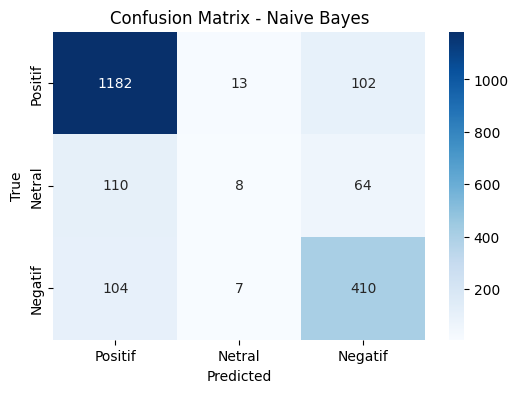


Model: SVM


c:\Users\ILYAS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.75      0.75      0.75       521
      Netral       0.28      0.14      0.19       182
     Positif       0.86      0.92      0.89      1297

    accuracy                           0.81      2000
   macro avg       0.63      0.61      0.61      2000
weighted avg       0.78      0.81      0.79      2000



c:\Users\ILYAS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


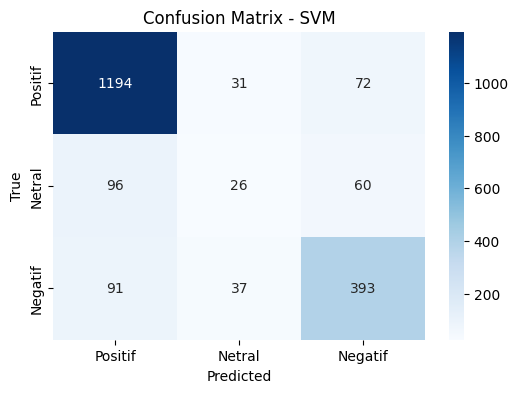


Model: Decision Tree
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.65      0.65      0.65       521
      Netral       0.23      0.16      0.19       182
     Positif       0.83      0.86      0.84      1297

    accuracy                           0.74      2000
   macro avg       0.57      0.56      0.56      2000
weighted avg       0.73      0.74      0.73      2000



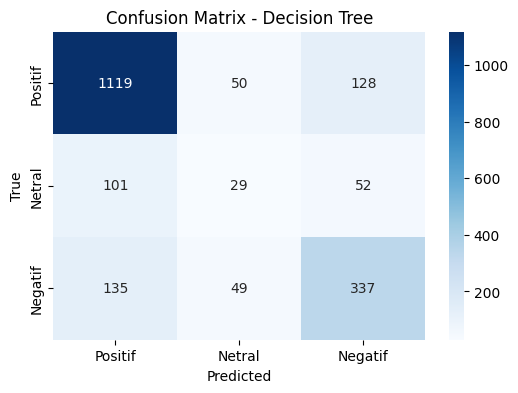


Model: KNN
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.66      0.56      0.61       521
      Netral       0.20      0.05      0.08       182
     Positif       0.78      0.91      0.84      1297

    accuracy                           0.74      2000
   macro avg       0.54      0.51      0.51      2000
weighted avg       0.69      0.74      0.71      2000



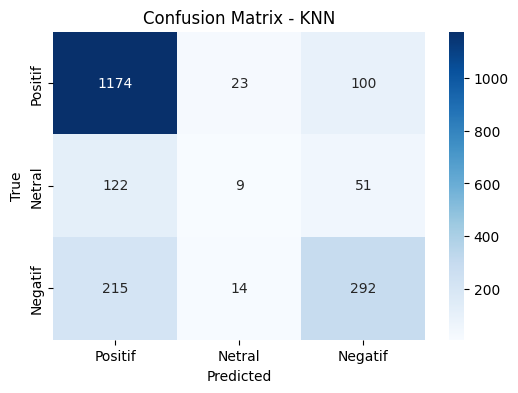


Model: Maximum Entropy
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.76      0.76      0.76       521
      Netral       0.24      0.11      0.15       182
     Positif       0.86      0.93      0.90      1297

    accuracy                           0.81      2000
   macro avg       0.62      0.60      0.60      2000
weighted avg       0.78      0.81      0.79      2000



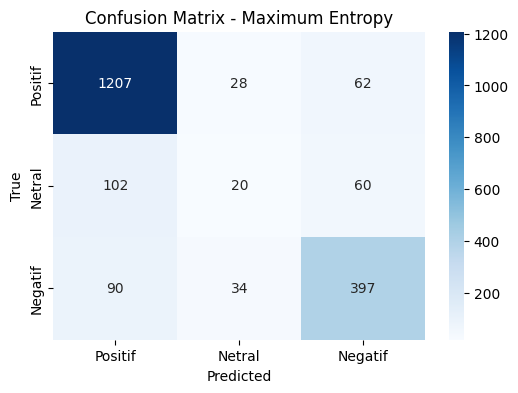

In [4]:
def main():
    # Step 1: Load and preprocess data
    data_path = "Data.csv"  # Replace with your dataset path
    data = load_and_prepare_data(data_path)
    
    # Step 2: Feature extraction and split
    X_train, X_test, y_train, y_test, vectorizer = extract_features_and_split(data)
    
    # Step 3: Define models
    models = {
        "Naive Bayes": MultinomialNB(),
        "SVM": LinearSVC(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=3),
        "Maximum Entropy": LogisticRegression(max_iter=1000)
    }
    
    # Step 4: Train and evaluate each model
    for model_name, model in models.items():
        train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test)

# Run the main function
if __name__ == "__main__":
    main()
